In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('duration,protocol_type,service,flag.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


C:\Users\aarzo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


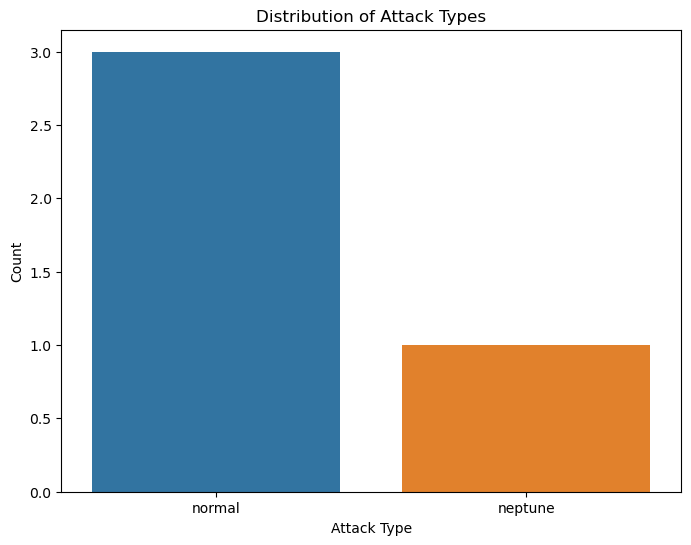

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable (e.g., attack types)
plt.figure(figsize=(8, 6))
sns.countplot(data['attack_type'])
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

# Distribution of other features (e.g., protocol type, service, etc.)
# Explore relationships between features and the target variable


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoder = LabelEncoder()
data['protocol_type'] = label_encoder.fit_transform(data['protocol_type'])
data['service'] = label_encoder.fit_transform(data['service'])
data['flag'] = label_encoder.fit_transform(data['flag'])
data['attack_type'] = label_encoder.fit_transform(data['attack_type'])

# Split the data into features and target
X = data.drop(columns=['attack_type'])
y = data['attack_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]
